In [ ]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [25]:
from typing import Any, cast

import matplotlib.pyplot as plt

import swcgeom
from swcgeom.analysis import draw, Sholl
from swcgeom.utils import numpy_printoptions

In [11]:
swc1 = "data/101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "data/101711-11_16-of-16_initial.CNG.swc"
swc3 = "data/1059283677_15257_2226-X16029-Y23953.swc"

# create a tree
tree1 = swcgeom.Tree.from_swc(swc1)
tree2 = swcgeom.Tree.from_swc(swc2)
tree3 = swcgeom.Tree.from_swc(swc3, extra_cols=["seg_id","level","mode","timestamp","TFresindex"])

In [29]:
from swcgeom.analysis import FeatureExtractor

features = FeatureExtractor(tree3)

print("===== Single Feature =====")
print("length", features.get("length"))

print("===== Feature List =====")
with numpy_printoptions(threshold=10):
    print(features.get(["length"]))

print("===== Features =====")
result_dict = features.get({
    "length": {},
    "node_radial_distance": {},
    "node_radial_distance_distribution": {},
    "node_branch_order": {},
    "node_branch_order_distribution": {},
    "branch_length": {},
    "branch_length_distribution": {},
    "path_length": {},
    "path_length_distribution": { "step": 100 },
    "sholl": {},
})
with numpy_printoptions(threshold=10):
    for k, v in result_dict.items():
        print(f"--- {k} ---")
        print(v)

===== Single Feature =====
length [53405.574]
===== Feature List =====
[array([53405.574], dtype=float32)]
===== Features =====
--- length ---
[53405.574]
--- node_radial_distance ---
[  0.        13.338282  14.72065  ... 168.15407  176.24298  188.8984  ]
--- node_radial_distance_distribution ---
[1. 0. 0. ... 0. 1. 1.]
--- node_branch_order ---
[0. 1. 2. ... 5. 4. 2.]
--- node_branch_order_distribution ---
[ 1.  8. 16. ...  2.  2.  2.]
--- branch_length ---
[ 27.220505  171.89203   153.07301   ...   3.2084856 201.65448
  16.394382 ]
--- branch_length_distribution ---
[ 0.  0. 10. ...  0.  0.  1.]
--- path_length ---
[234.80057 348.2202  199.11252 ... 916.90247 293.3543  219.92435]
--- path_length_distribution ---
[ 0. 15. 27. ...  0.  0.  2.]
--- sholl ---
[8. 8. 8. ... 1. 1. 1.]


avg: 5.9785867237687365
std: 3.834863698651197
sum: 2792


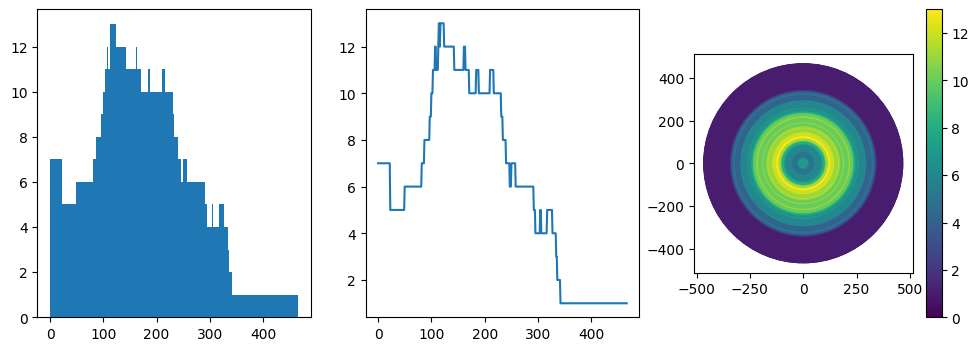

In [5]:
from swcgeom.analysis import Sholl

sholl_result = Sholl(tree1)
print(f"avg: {sholl_result.avg()}")
print(f"std: {sholl_result.std()}")
print(f"sum: {sholl_result.sum()}")

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
_ = sholl_result.plot(plot_type="bar", ax=ax0)
_ = sholl_result.plot(plot_type="linechart", ax=ax1)
_ = sholl_result.plot(plot_type="circles", ax=ax2)

In [28]:
from swcgeom.analysis import BranchFeatures

BranchFeatures(tree1).get_angle()

array([[0.0000000e+00, 3.1412473e+00, 5.9548086e-01, ..., 2.0342171e+00,
        2.1122606e+00, 3.0304115e+00],
       [3.1412473e+00, 0.0000000e+00, 2.5463777e+00, ..., 1.1071100e+00,
        1.0295975e+00, 1.1091497e-01],
       [5.9548086e-01, 2.5463777e+00, 0.0000000e+00, ..., 2.6296735e+00,
        1.5167799e+00, 2.6570952e+00],
       ...,
       [2.0342171e+00, 1.1071100e+00, 2.6296735e+00, ..., 0.0000000e+00,
        2.1366858e+00, 9.9632800e-01],
       [2.1122606e+00, 1.0295975e+00, 1.5167799e+00, ..., 2.1366858e+00,
        0.0000000e+00, 1.1403581e+00],
       [3.0304115e+00, 1.1091497e-01, 2.6570952e+00, ..., 9.9632800e-01,
        1.1403581e+00, 3.4526698e-04]], dtype=float32)